### 이변량 자료Bivariate Data의 분석

ex) yellow stone(geyser) 자료

In [3]:
library(MASS)
data("geyser")

In [5]:
str(geyser)

'data.frame':	299 obs. of  2 variables:
 $ waiting : num  80 71 57 80 75 77 60 86 77 56 ...
 $ duration: num  4.02 2.15 4 4 4 ...


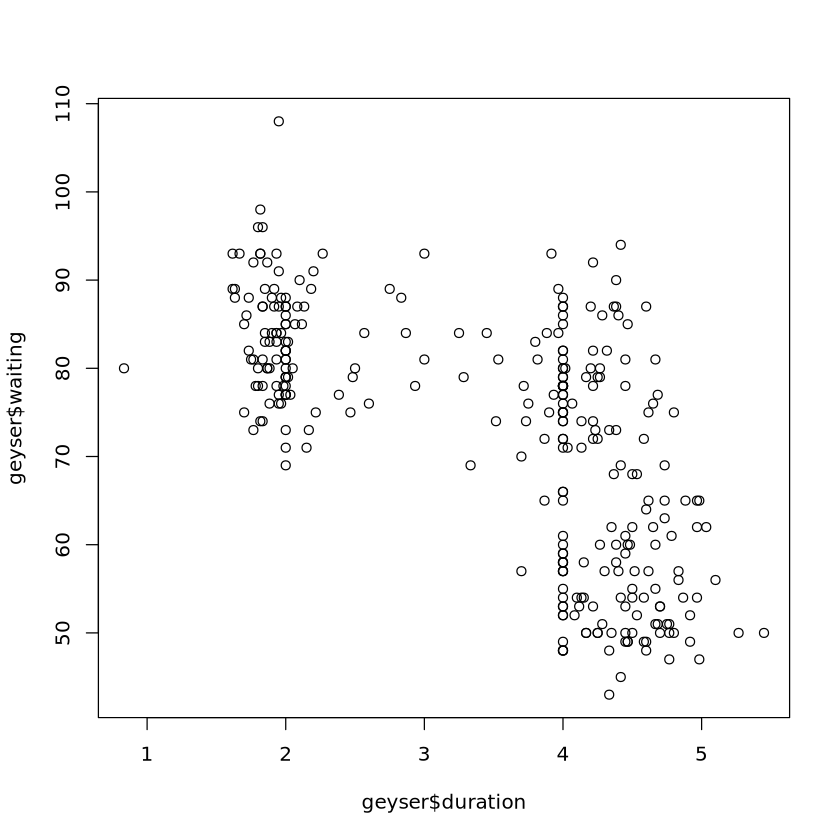

In [9]:
plot(geyser$duration, geyser$waiting)

`-` 시각화

* 두 개의 수치형 자료 : scatter plot, heat map, line plot ...
* 하나는 수치형, 하나는 범주형 자료 : violin plot, box plot
* 모두 범주형 자료 : bar chart

`-` 산점도와 흐트림(smooth)

* Scatter plot

[1] 0.9159849
[1] 0.8432178
[1] 0.8838779
[1] 0.9191296


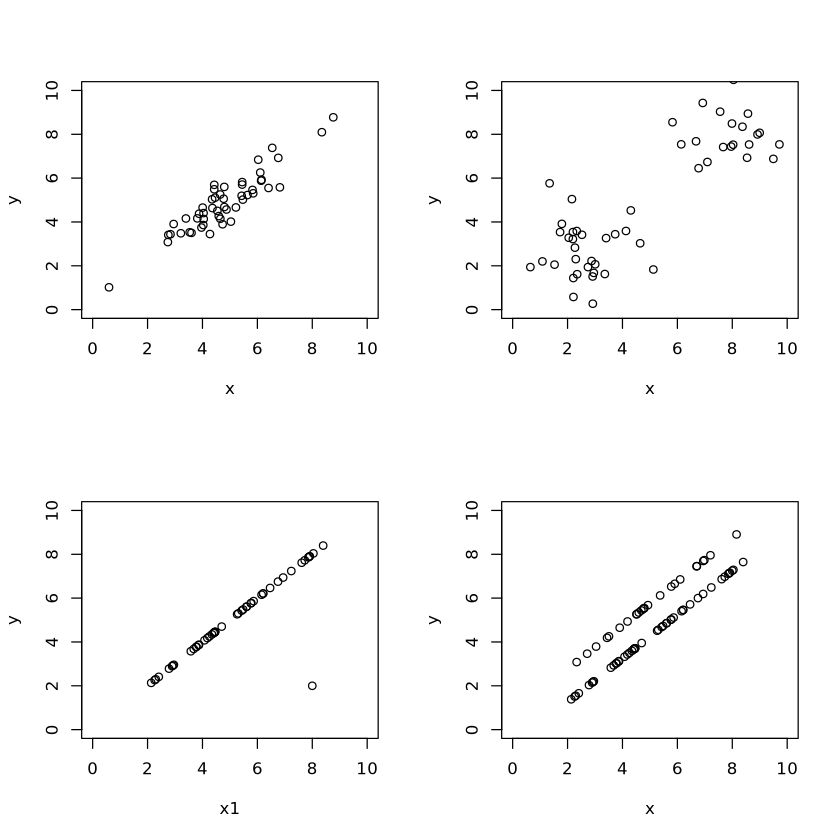

In [23]:
par(mfrow = c(2,2))

## a
x = 5 + rnorm(50, 0, 1.5)
y = 0.9*(x-5) + sqrt(0.19)*rnorm(50, 0, 1.5) + 5
print(cor(x, y))
plot(y~x, xlim = c(0, 10), ylim = c(0, 10))

## b
x = c(rnorm(30, 3, 1), rnorm(20, 8, 1))
y = c(rnorm(30, 3, 1), rnorm(20, 8, 1))
print(cor(x, y))
plot(y~x, xlim = c(0, 10), ylim = c(0, 10))

## c
x1 = sort(5 + rnorm(50, 0, 1.5))
y = x1
x1[50] = 8; y[50] = 2
print(cor(x1, y))
plot(y~x1, xlim = c(0, 10), ylim = c(0, 10))

## d
y1 = x1 - 0.75
x2 = sort(5 + rnorm(25, 0, 1.5))
y2 = x2+0.75
x = c(x1, x2); y = c(y1, y2)
print(cor(x, y))
plot(y~x, xlim = c(0, 10), ylim = c(0, 10))

> 상관계수는 선형 상관관계를 나타낼 뿐, 상관관계의 유무를 판별하는 것은 어려움. 따라서 산점도는 필수, 상관계수는 참고사항임.

* 흐트림 기법(Jittering)

> 정수 자료를 가지는 변수 값에 임의적 오차를 덧붙여 자료 점들을 흐트러뜨려, 내재된 자료 패턴을 자연스럽게 시각화하는 방법.

In [24]:
n <- length(x)
r <- x + runif(n)
z <- max(x) - min(x)

[1] 2.133497 2.259505 2.297235 2.408731 2.782464 2.894596 2.927406 2.957485
 [9] 3.575871 3.681664 3.767497 3.782331 3.856304 3.875030 4.075433 4.177592
[17] 4.252312 4.345065 4.408854 4.422247 4.438503 4.444708 4.449870 4.457381
[25] 4.462454 4.700747 5.262774 5.304299 5.429682 5.479398 5.604767 5.608378
[33] 5.761843 5.777786 5.863379 6.153521 6.206389 6.212778 6.463197 6.751015
[41] 6.938610 7.236121 7.614496 7.725686 7.856448 7.890245 7.909485 8.040448
[49] 8.396332 8.000000 2.332197 2.714256 3.039574 3.438315 3.506994 3.899486
[57] 4.184293 4.510253 4.519364 4.594568 4.687162 4.762220 4.781399 4.795912
[65] 4.929216 5.372633 5.777449 5.903706 6.102832 6.699153 6.711076 6.944624
[73] 6.982718 7.204998 8.155995

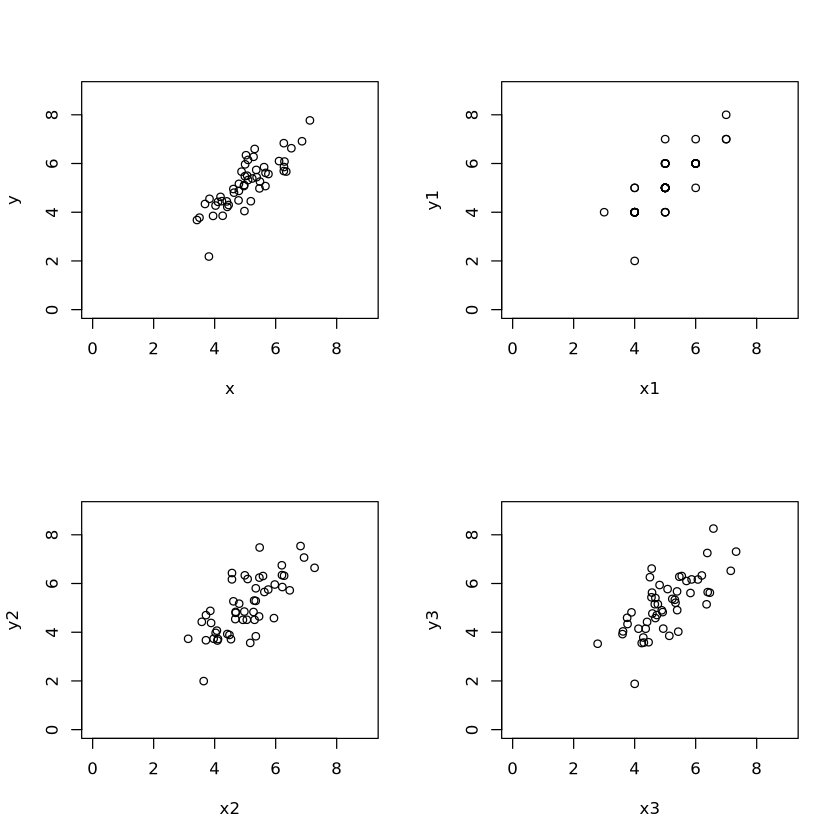

In [30]:
par(mfrow = c(2,2))

## X~N(5,1), Y~N(5, 1)에서 난수를 뽑아 Cor(x, y) = 0.8이 되도록 생성
x = rnorm(50) + 5
y = rnorm(50)*0.6 + (x-5)*0.8 + 5
plot(y~x, xlim = c(0, 9), ylim = c(0, 9))

## 정수로 반올림하는 경우
x1 = round(x)
y1 = round(y)
plot(y1~x1, xlim = c(0, 9), ylim = c(0, 9))

## U(-0.5, 0.5)에서 난수를 뽑아 정수로 반올림한 것에 더함
x2 = x1 + runif(50, -0.5, 0.5)
y2 = y1 + runif(50, -0.5, 0.5)
plot(y2~x2, xlim = c(0, 9), ylim = c(0, 9))

## jitter() 함수 이용
x3 = jitter(x1, amount = 0.5)
y3 = jitter(y1, amount = 0.5)
plot(y3~x3, xlim = c(0, 9), ylim = c(0, 9))

`-` k(`amount`)값에 따른 산점도 변화

> 흐트러짐의 정도는 커져도, 상관계수 값은 일정함. 정수값을 가질 때보다는 상관계수가 낮아짐.

In [31]:
cor(x1, y1)

[1] 0.7983483

In [32]:
cor(x2, y2)

[1] 0.7226878

In [33]:
cor(x3, y3)

[1] 0.7169582

In [37]:
cor(jitter(x1, amount = 2), jitter(y1, amount = 2))

[1] 0.4390069

> 상관계수 작아지는데?? 뭐임.

예제) 남태평양 피지의 지진 자료(변수명 : quakes)

In [39]:
library(lattice)
data(quakes)

In [41]:
str(quakes)

'data.frame':	1000 obs. of  5 variables:
 $ lat     : num  -20.4 -20.6 -26 -18 -20.4 ...
 $ long    : num  182 181 184 182 182 ...
 $ depth   : int  562 650 42 626 649 195 82 194 211 622 ...
 $ mag     : num  4.8 4.2 5.4 4.1 4 4 4.8 4.4 4.7 4.3 ...
 $ stations: int  41 15 43 19 11 12 43 15 35 19 ...


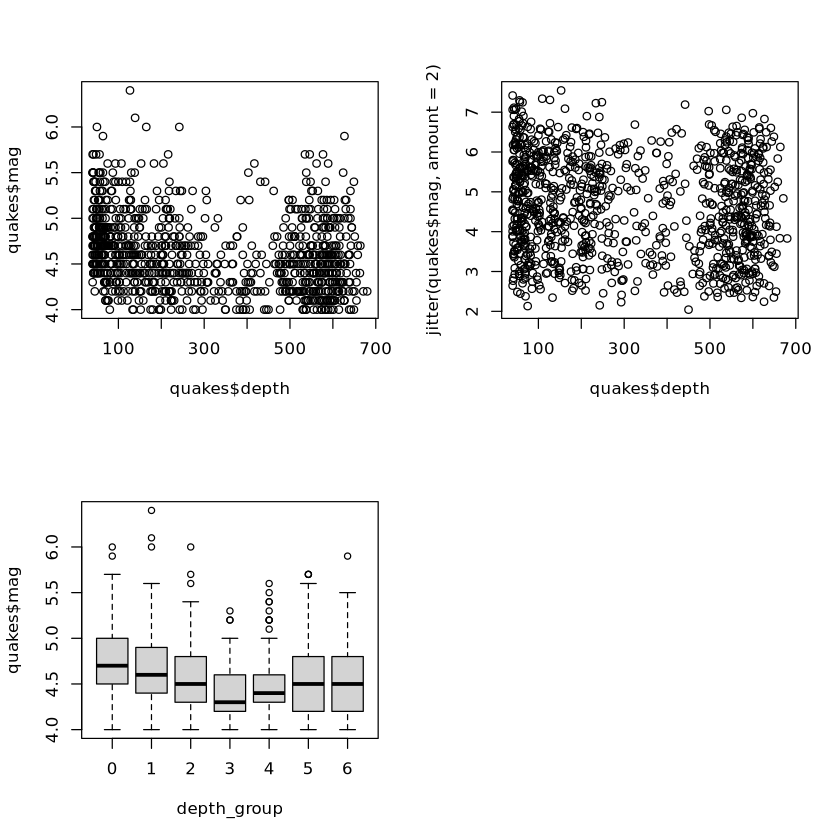

In [54]:
par(mfrow = c(2, 2))
plot(quakes$depth, quakes$mag)
plot(quakes$depth, jitter(quakes$mag, amount = 2))
depth_group = trunc(quakes$depth/100)  ## 반올림
boxplot(quakes$mag~depth_group)